In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1

In [2]:
data = pd.read_csv('US_Regional_Sales_Data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.describe()

_SalesTeamID  _CustomerID     _StoreID   _ProductID  Order Quantity  \
count   7991.000000  7991.000000  7991.000000  7991.000000     7991.000000   
mean      14.384307    25.457014   183.850081    23.771743        4.525341   
std        7.986086    14.414883   105.903946    13.526545        2.312631   
min        1.000000     1.000000     1.000000     1.000000        1.000000   
25%        8.000000    13.000000    91.000000    12.000000        3.000000   
50%       14.000000    25.000000   183.000000    24.000000        5.000000   
75%       21.000000    38.000000   276.000000    36.000000        7.000000   
max       28.000000    50.000000   367.000000    47.000000        8.000000   

       Discount Applied  
count       7991.000000  
mean           0.114394  
std            0.085570  
min            0.050000  
25%            0.050000  
50%            0.075000  
75%            0.150000  
max            0.400000

# Feature

In [6]:
data['Unit Cost'] = data['Unit Cost'].str.replace(',','')
data['Unit Price'] = data['Unit Price'].str.replace(',','')

In [7]:
data['Unit Cost'] = pd.to_numeric(data['Unit Cost'])
data['Unit Price'] = pd.to_numeric(data['Unit Price'])
data['ProcuredDate'] = pd.to_datetime(data['ProcuredDate'])
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['ShipDate'] = pd.to_datetime(data['ShipDate'])
data['DeliveryDate'] = pd.to_datetime(data['DeliveryDate'])

C:\Users\yasse\AppData\Local\Temp\ipykernel_20384\2449594886.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ProcuredDate'] = pd.to_datetime(data['ProcuredDate'])
C:\Users\yasse\AppData\Local\Temp\ipykernel_20384\2449594886.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['OrderDate'] = pd.to_datetime(data['OrderDate'])
C:\Users\yasse\AppData\Local\Temp\ipykernel_20384\2449594886.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['ShipDate'] = pd.to_datetime(data['ShipDate'])
C:\Users\yasse\AppData\Local\Temp\ipykernel_20384\2449594886.py:6: UserWarn

In [8]:
data['DeliveryYear'] = data['DeliveryDate'].dt.year
data['DeliveryMonth'] = data['DeliveryDate'].dt.month
data['DeliveryDay'] = data['DeliveryDate'].dt.day

data['OrderYear'] = data['OrderDate'].dt.year
data['OrderMonth'] = data['OrderDate'].dt.month
data['OrderDay'] = data['OrderDate'].dt.day

data['ShipYear'] = data['ShipDate'].dt.year
data['ShipMonth'] = data['ShipDate'].dt.month
data['ShipDay'] = data['ShipDate'].dt.day

data['ProcuredYear'] = data['ProcuredDate'].dt.year
data['ProcuredMonth'] = data['ProcuredDate'].dt.month
data['ProcuredDay'] = data['ProcuredDate'].dt.day

In [9]:
data['Total Sales'] = data['Order Quantity'] * data['Unit Price']
data["Order_to_Ship_Days"] = (data["ShipDate"] - data["OrderDate"]).dt.days
data["Ship_to_Delivery_Days"] = (data["DeliveryDate"] - data["ShipDate"]).dt.days
data["Order_to_Delivery_Days"] = (data["DeliveryDate"] - data["OrderDate"]).dt.days

# outliers

In [10]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [11]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [12]:
outlier_columns = ["Order Quantity", "Discount Applied", "Unit Cost", "Unit Price"]
outliers = {col: detect_outliers(data, col) for col in outlier_columns}

{col: len(outliers[col]) for col in outlier_columns}

{'Order Quantity': 0,
 'Discount Applied': 346,
 'Unit Cost': 247,
 'Unit Price': 0}

In [13]:
data = remove_outliers(data, "Unit Cost")

In [14]:
outlier_columns = ["Order Quantity", "Discount Applied", "Unit Cost", "Unit Price"]
outliers = {col: detect_outliers(data, col) for col in outlier_columns}

{col: len(outliers[col]) for col in outlier_columns}

{'Order Quantity': 0,
 'Discount Applied': 332,
 'Unit Cost': 87,
 'Unit Price': 0}

In [15]:
o = detect_outliers(data, 'Unit Cost') 

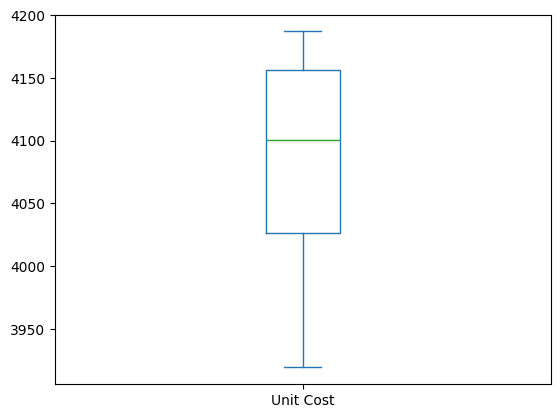

In [16]:
o['Unit Cost'].plot(kind='box')
plt.show()

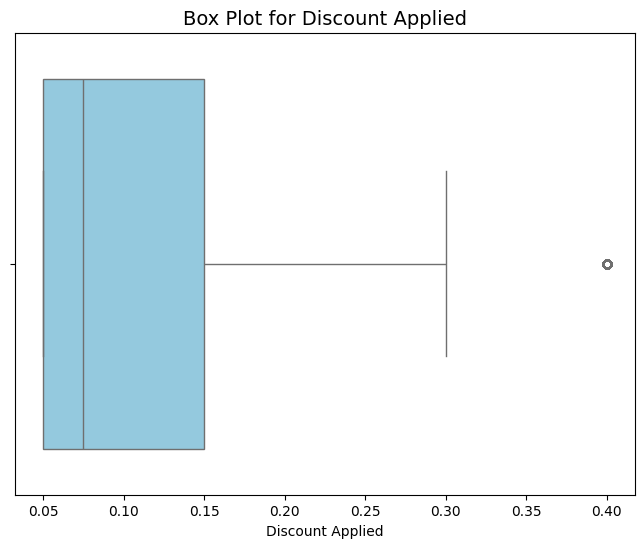

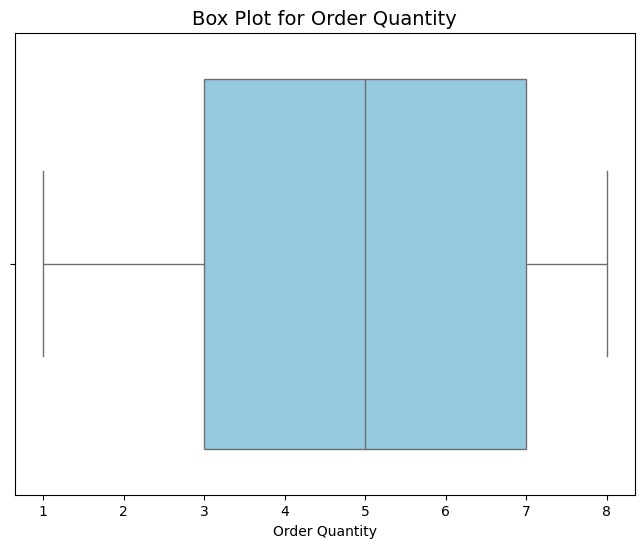

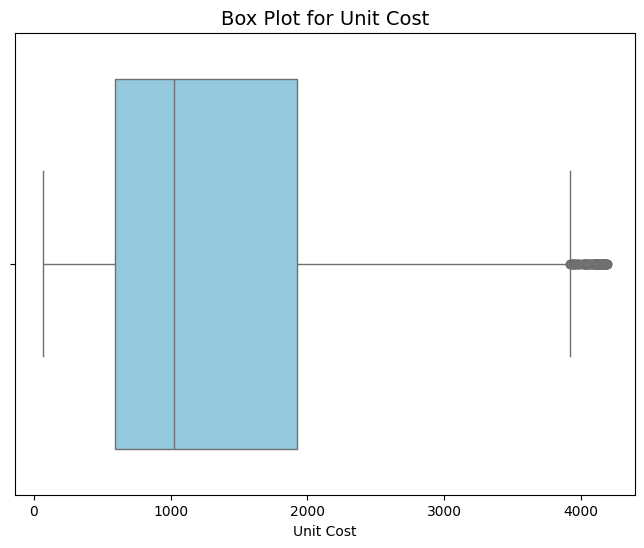

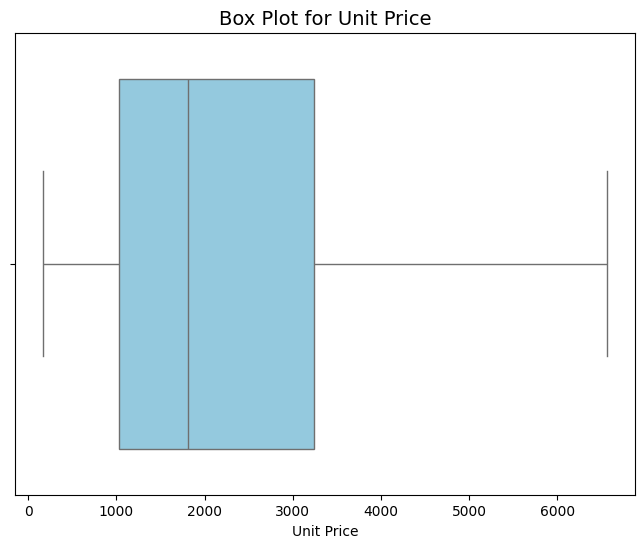

In [17]:
cols = data[['Discount Applied','Order Quantity','Unit Cost','Unit Price']]
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f'Box Plot for {col}', fontsize=14)
    plt.xlabel(col)
    plt.show()

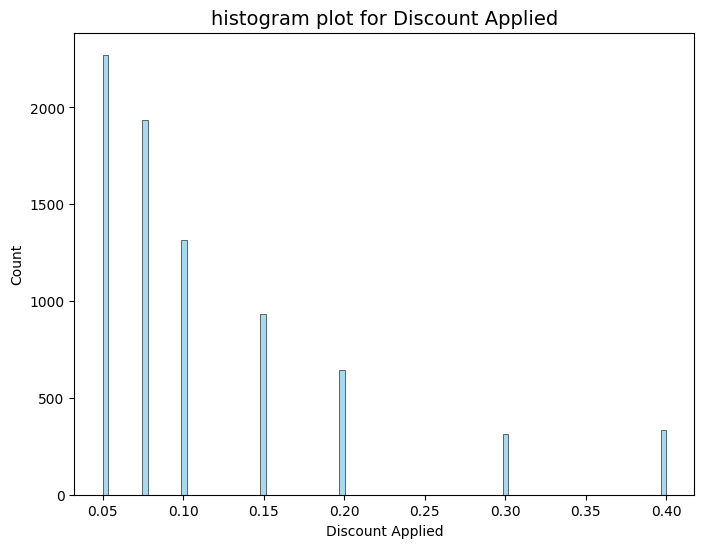

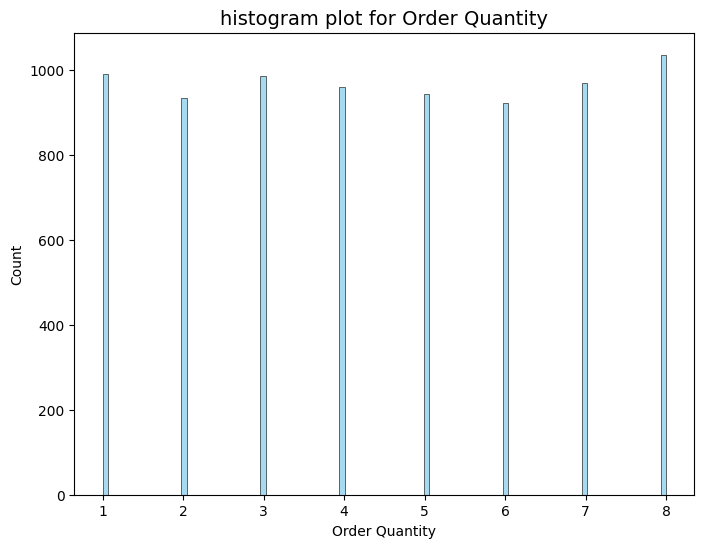

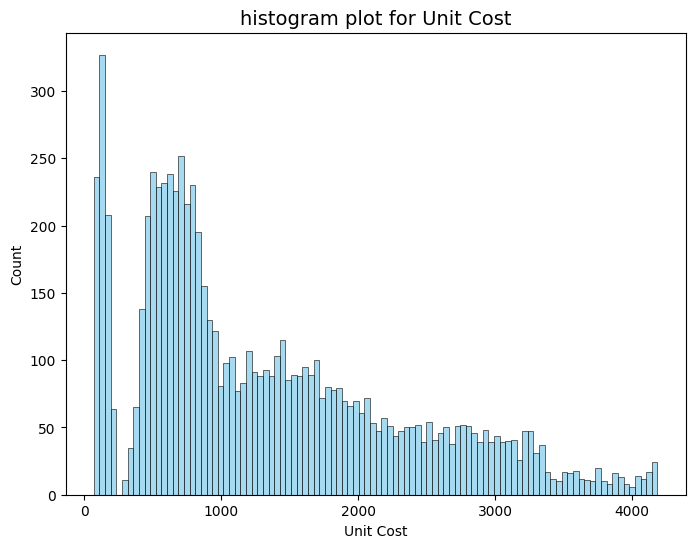

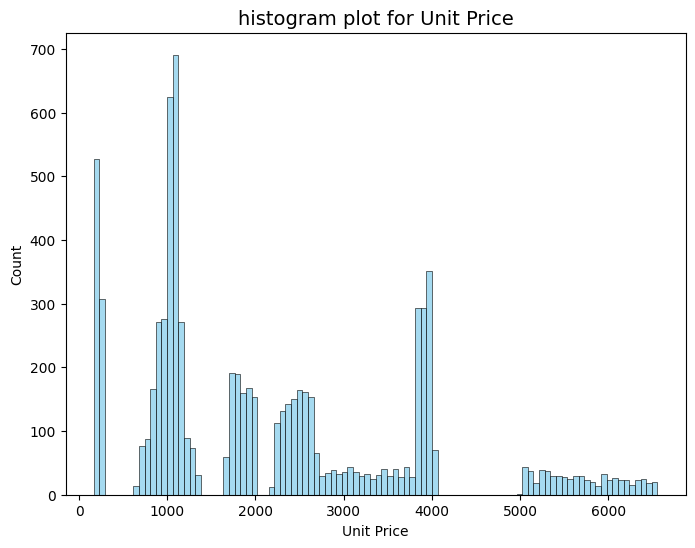

In [18]:
cols = data[['Discount Applied','Order Quantity','Unit Cost','Unit Price']]
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, color='skyblue',bins=100)
    plt.title(f'histogram plot for {col}', fontsize=14)
    plt.xlabel(col)
    plt.show()

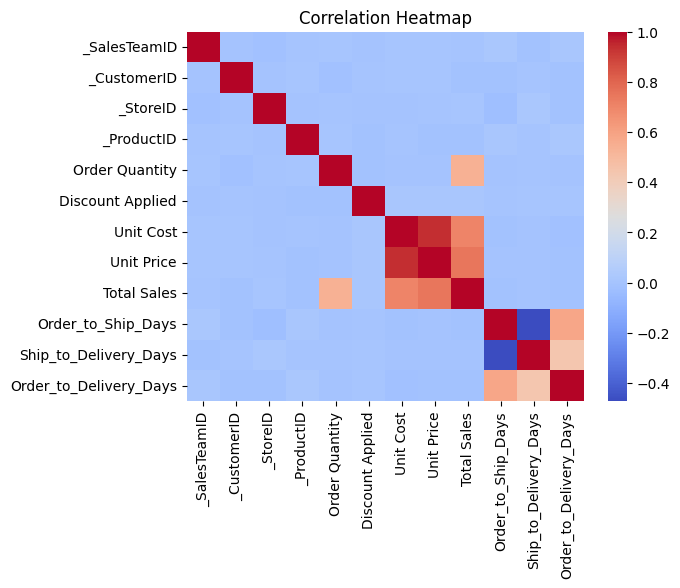

In [19]:
corr = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
data.to_csv("cleaned_dataset.csv")

# Insights

### 1. *Seasonality in Sales*  
    Sales peak July (7), indicating strong monthly Sales.

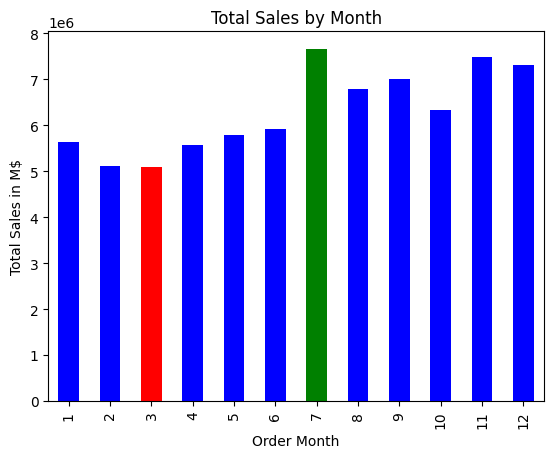

In [21]:
monthly_sales = data.groupby('OrderMonth')['Total Sales'].sum()

max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()

colors = ['green' if month == max_month else 'red' if month == min_month else 'blue' for month in monthly_sales.index]

monthly_sales.plot(kind='bar', color=colors)

plt.title('Total Sales by Month')
plt.xlabel('Order Month')
plt.ylabel('Total Sales in M$')
plt.show()


### 2. *Product Popularity*  
   Product IDs 23, 40, and 37 are top sellers. Product-specific trends heavily influence Total Sales.

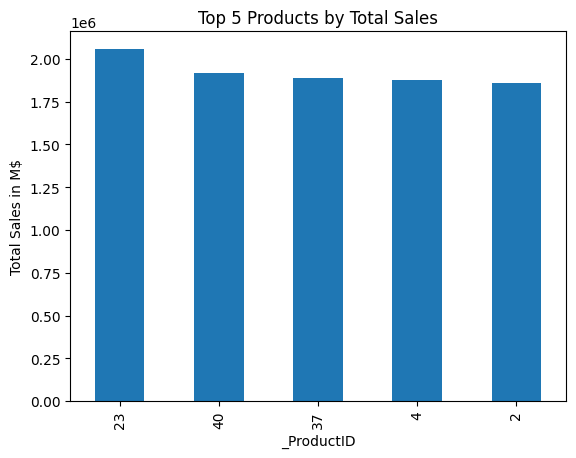

In [22]:
data.groupby('_ProductID')['Total Sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 Products by Total Sales')
plt.ylabel('Total Sales in M$')
plt.show()

### 3. *Discount Impact*  
   Higher discounts correlate with increase In Total Sales.

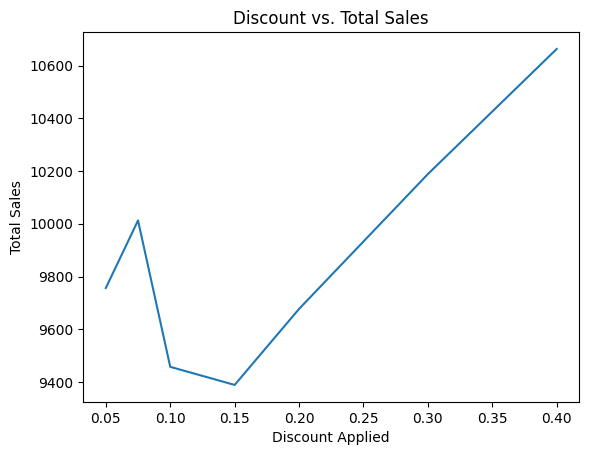

In [23]:
data.groupby('Discount Applied')['Total Sales'].mean().plot()
plt.xlabel('Discount Applied')
plt.ylabel('Total Sales')
plt.title('Discount vs. Total Sales')
plt.show()

### 4. *Sales Channel Preference*  
   The "In-Store" channel drives the highest order volume.

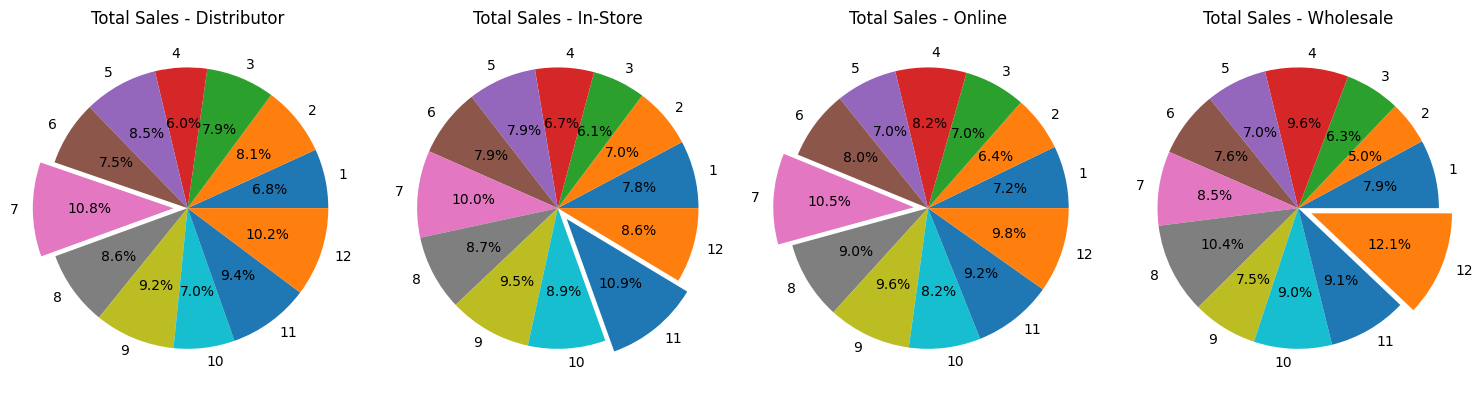

In [24]:
grouped_data = data.groupby(['Sales Channel', 'OrderMonth'])['Total Sales'].sum().unstack()

fig, axes = plt.subplots(1,4, figsize=(15, 5))

for ax, (channel, sales) in zip(axes, grouped_data.iterrows()):
    explode = [0.1 if val == sales.max() else 0 for val in sales]  # Explode max value
    sales.plot(kind='pie', ax=ax, autopct='%1.1f%%', explode=explode, legend=False)
    ax.set_title(f'Total Sales - {channel}')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()


### 5. *Warehouse Performance*  
   Warehouses WARE-NMK1003 and WARE-UHY1005 handle the most orders.

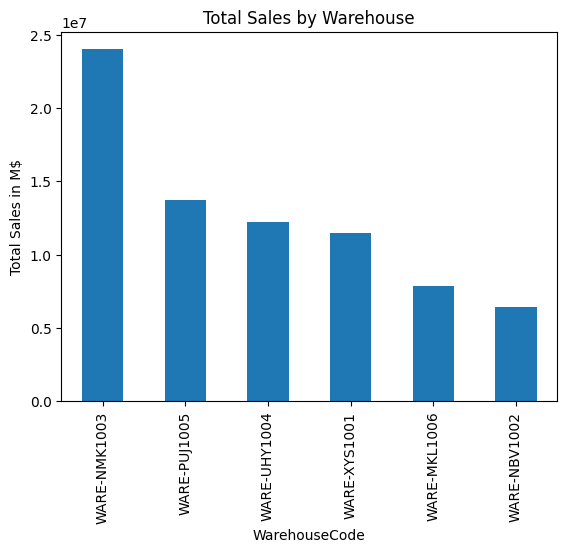

In [25]:
data.groupby('WarehouseCode')['Total Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Warehouse')
plt.ylabel('Total Sales in M$')
plt.show()